In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data

In [4]:
type(X)

numpy.ndarray

### Строим график BoxWhiskers, находим медиану и квартили, получаем значение усов

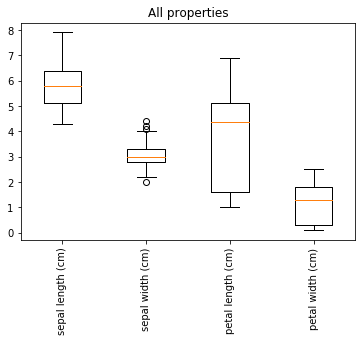

In [5]:
fig, ax = plt.subplots()
ax.set_title('All properties')
p = ax.boxplot(X)
plt.xticks([1, 2, 3, 4], iris.feature_names, rotation = 'vertical')
plt.show()

##### получаем данные об усах с элементов графика

In [6]:
[item.get_ydata() for item in p['whiskers']][2:4]

[array([2.8, 2.2]), array([3.3, 4. ])]

In [7]:
sepalLength = X[:,1] #sepal - чашелистик

In [8]:
np.median(sepalLength)

3.0

Получаем квантиль 1, 2 (медиана), 3

In [9]:
q1q2q3 = np.quantile(sepalLength, [0.25,0.50,0.75])
print(q1q2q3)

[2.8 3.  3.3]


#### Найдём границы усов вручную

In [10]:
def GetWhiskers(column):
    times = 1.5
    q1q2q3 = np.quantile(column, [0.25,0.50,0.75])
    IQR = q1q2q3[2]-q1q2q3[0]
    w1 = q1q2q3[0]-times*IQR
    w2 = q1q2q3[2]+times*IQR
    return (q1q2q3[0], column[column >= w1].min()), (q1q2q3[2], column[column <= w2].max())

In [11]:
print(GetWhiskers(sepalLength))

((2.8, 2.2), (3.3, 4.0))


### Получаем тот же график, медиану и квартили из DataFrame

In [12]:
import pandas as pd
data = pd.read_csv('ph-data.csv')

In [13]:
df = data.iloc[:,0:3] 

In [14]:
df[:5]

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255
3,22,205,255
4,38,223,221


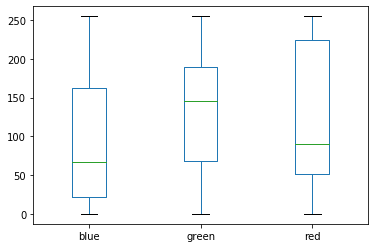

In [15]:
p2 = df.boxplot(grid=False)

Если попадутся значения выше 255 или ниже 0, это будут ошибки измерения

In [16]:
df['blue'].median()

67.0

In [17]:
df['blue'].quantile([0.25,0.5,0.75])

0.25     22.0
0.50     67.0
0.75    162.0
Name: blue, dtype: float64